In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [2]:
np.random.seed(42)

In [3]:
data = {
    'Pclass': np.random.choice([1, 2, 3], size=1000),
    'Age': np.random.randint(1, 100, size=1000),
    'SibSp': np.random.randint(0, 8, size=1000),
    'Parch': np.random.randint(0, 6, size=1000),
    'Fare': np.random.uniform(0, 300, size=1000),
    'Sex': np.random.choice(['male', 'female'], size=1000),
    'Survived': np.random.choice([0, 1], size=1000)
}

In [7]:
titanic_df = pd.DataFrame(data)
titanic_df['Sex'] = titanic_df['Sex'].map({'male': 0, 'female': 1})

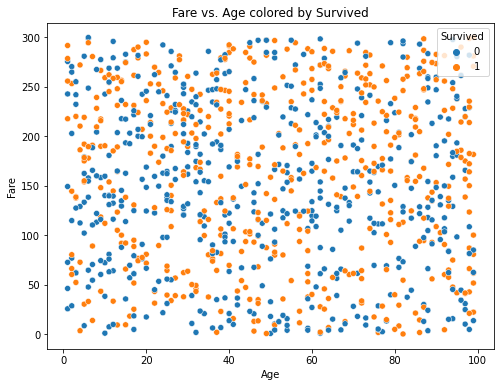

In [8]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=titanic_df)
plt.title('Fare vs. Age colored by Survived')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(title='Survived', loc='upper right')
plt.show()

In [9]:
X = titanic_df.drop('Survived', axis=1)
y = titanic_df['Survived']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
clf = DecisionTreeClassifier()

In [12]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [13]:
y_pred = clf.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [16]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.525


In [17]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [18]:
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, cv=5, verbose=5)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2;, score=0.512 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2;, score=0.475 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2;, score=0.575 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2;, score=0.537 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2;, score=0.544 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=5;, score=0.512 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=5;, score=0.475 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=5;, score=0.575 total time=   0.0s
[CV 4/5] END crite

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             verbose=5)

In [19]:
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best parameters: {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best cross-validation score: 0.545


In [20]:
best_clf = grid_search.best_estimator_
best_clf.fit(X_train, y_train)
y_pred_best = best_clf.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print("Accuracy with best parameters:", accuracy_best)

Accuracy with best parameters: 0.47


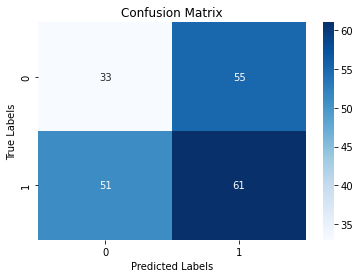

In [21]:
cn = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cn, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

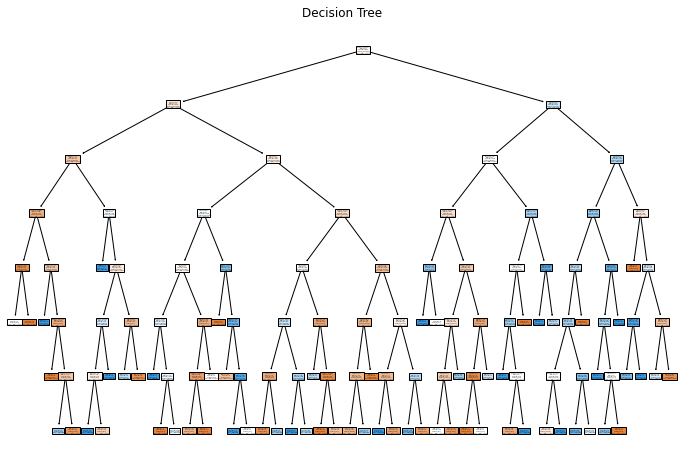

In [24]:
plt.figure(figsize=(12, 8))
plot_tree(best_clf, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.title('Decision Tree')
plt.show()

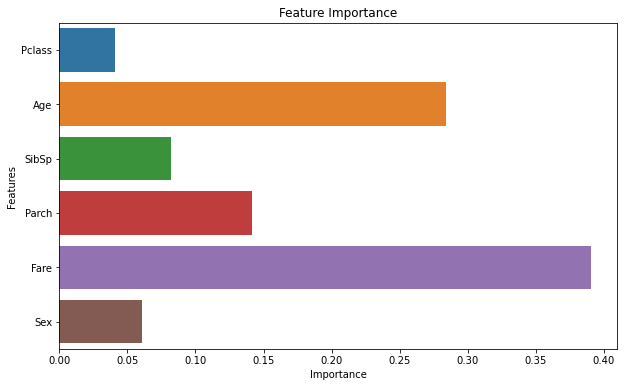

In [25]:
plt.figure(figsize=(10, 6))
importance = best_clf.feature_importances_
sns.barplot(x=importance, y=X.columns)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()